In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import requests
from bs4 import BeautifulSoup
from tabulate import tabulate

## We import the databases we have previously cleaned

#### Import Airbnb database

In [2]:
airbnb_NYC = pd.read_csv("./output/airbnb_NYC.csv", encoding = "ISO-8859-1")

In [3]:
airbnb_NYC.shape

(48895, 10)

In [4]:
airbnb_NYC.head()

,id,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,2539,2787,Brooklyn,Kensington,Private room,149,1,9,0.21,365
1,2595,2845,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,355
2,3647,4632,Manhattan,Harlem,Private room,150,3,0,NaN,365
3,3831,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,194
4,5022,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,0


#### Import of NYC population database

In [5]:
NYC_population = pd.read_csv("./output/NYC_population.csv", encoding = "ISO-8859-1")

In [6]:
NYC_population.shape

(55, 5)

In [7]:
NYC_population.head()

,Borough,region,Males,Females,Total Population
0,Bronx,"Riverdale, Fieldston & Kingsbridge","51,598","61,481","113,079"
1,Bronx,"Wakefield, Williamsbridge & Woodlawn","65,216","78,387","143,604"
2,Bronx,"Co-op City, Pelham Bay & Schuylerville","55,037","65,204","120,241"
3,Bronx,"Pelham Parkway, Morris Park & Laconia","60,974","67,982","128,956"
4,Bronx,"Belmont, Crotona Park East & East Tremont","77,119","89,293","166,411"


In [12]:
type("Total Population")

str

## Analysis and visualization

Once we have imported the data we have cleaned, we want to know the relationship existing between them. In our case, as it is shown, our databases are related with Airbnb in NYC during 2019 and the population of each neigborhood in the city.

### Figure 1: Distribution of Airbnb acommodations depending on neighbourhood_group

<AxesSubplot:xlabel='neighbourhood_group', ylabel='Probability'>

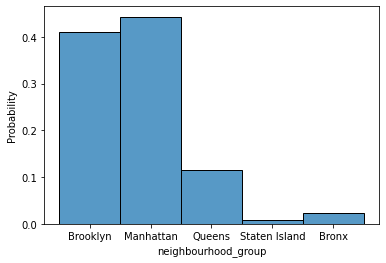

In [8]:
sns.histplot(data = airbnb_NYC, x = "neighbourhood_group", stat = "probability", discrete = True)

The chart above shows that, *Manhattan* is the neighborhood in which the majority approximately *45%* of the available apartments in New York in 2019.

Followed by *Brooklyn* where 40% of the apartments are located.

*Queens, Staten Island and the Bronx* comprise the remaining *15%*.

### Figure 2: Distribution of NYC neighborhood's population.

<AxesSubplot:xlabel='Borough', ylabel='Probability'>

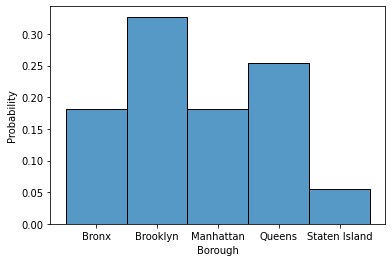

In [9]:
sns.histplot(data = NYC_population, x = "Borough", stat = "probability", discrete = True)

Analyzing the population distribution data by neighborhood, we observe a more regular distribution. 

- *Brooklyn* is identified as the neighborhood where approximately *30%* of the city's population lives.
- *Queens* :  *25%* of New Yorkers live in the neighborhood, while only *10%* of Airbnb availability is located there.
- *Manhattan*: about *18%* of the city population lives there. However, the *45%* of rooms available on Airbnb are located in this neighborhood.
- *Bronx*: the same % of population than Manhattan. In contrast to that neighborhood, the number of rooms available on Airbnb is much lower (representing approximately 4%).
- *Staten Island*: it represents the lowest population level of the city, *5%*, as well as the lowest number of rooms availables in Airbnb.



### Figure 3: Distribution of fatal Airbnb room type

<AxesSubplot:xlabel='room_type', ylabel='Probability'>

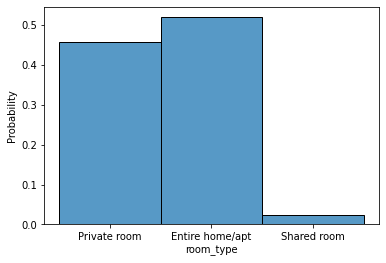

In [45]:
sns.histplot(data = airbnb_NYC, x = "room_type", stat = "probability", discrete = True)

In the chart above, we observe that almost the *50%* are *entire homes*; around the *40%* of the availability in Airbnb are *private rooms* and less than *5%* is associated to *shared rooms*.

### Figure 4: Distribution of fatal Airbnb room type for each neighborhood

<AxesSubplot:xlabel='neighbourhood_group', ylabel='count'>

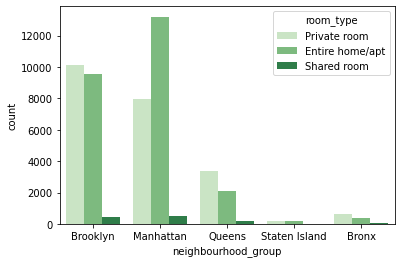

In [10]:
sns.countplot(x = airbnb_NYC.neighbourhood_group, hue = airbnb_NYC.room_type, palette="Greens")

Looking at *Graph 4*, we can see that when visiting NYC and staying in an Airbnb: 

- If you you are looking for a whole apartment, you are more likely to find it in *Manhattan*.

- If a private room is preferred, it will be in *Brooklyn* where more options are found.

The total number of shared rooms is not significant.